In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train = pd.read_pickle(r"C:\Users\전대혁\TEST_Lab\machine-learning-master\data\pkl\basketball_train.pkl")
test = pd.read_pickle(r"C:\Users\전대혁\TEST_Lab\machine-learning-master\data\pkl\basketball_test.pkl")

In [12]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# find best k, range from 3 to half of the number of data
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK' , 'TRB']]
y_train = train[['Pos']]

# 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                             cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.925,
 0.925,
 0.9375,
 0.9375,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9125,
 0.9,
 0.8875,
 0.8625,
 0.875,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375]

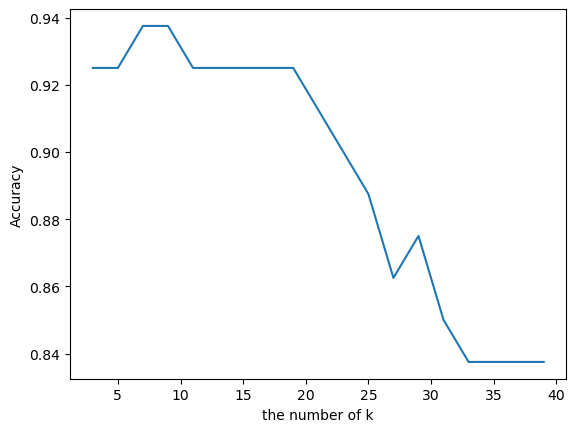

In [13]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [14]:
# find best k
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k : " + str(k) )

The best number of k : 7


In [24]:
# 2개의 특징으로 예측하기
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# select data features
x_train = train[['3P', 'BLK']]
# select target value
y_train = train[['Pos']]

# setup knn using train data
knn.fit(x_train, y_train.values.ravel())

# select data feature to be used for prediction
x_test = test[['3P', 'BLK']]

# select target value
y_test = test[['Pos']]

# test
pred = knn.predict(x_test)

In [25]:
# check ground_truth with knn prediction
comparison = pd.DataFrame(
    {'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,C,SG
1,SG,SG
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,SG,SG
7,SG,SG
8,C,C
9,C,C


In [26]:
# check accuracy
print("accuracy : "+ 
          str(accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.9


In [28]:
# 3개의 특징으로 예측하기
knn = KNeighborsClassifier(n_neighbors=k)

# select data features to be used in train
x_train = train[['3P', 'BLK', 'TRB']]
# select target
y_train = train[['Pos']]

# build knn model
knn.fit(x_train, y_train.values.ravel())

# select features to be used for prediction
x_test = test[['3P', 'BLK', 'TRB']]

# select target
y_test = test[['Pos']]

# test
pred = knn.predict(x_test)

In [29]:
# check ground_truth with knn prediction
comparison = pd.DataFrame(
    {'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,C,SG
1,SG,SG
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,SG,SG
7,SG,SG
8,C,C
9,C,C


In [30]:
# check accuracy
print("accuracy : " + 
          str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.85
